In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [117]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [118]:
df.sample(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure   
6138  4833-QTJNO    Male              1     Yes         No      67  \
6941  2405-LBMUW  Female              0     Yes        Yes      61   
6499  2676-ISHSF    Male              0      No         No       1   
3880  9470-RTWDV    Male              0     Yes        Yes      26   
1501  5014-GSOUQ    Male              0      No         No      13   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...   
6138          Yes               Yes     Fiber optic                  Yes  ...  \
6941           No  No phone service             DSL                  Yes  ...   
6499          Yes                No              No  No internet service  ...   
3880          Yes               Yes             DSL                   No  ...   
1501          Yes                No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV   
6138                   No                   No                   No  \
6941                   No                  Yes                   No   
6499  No internet service  No internet service  No internet service   
3880                  Yes                  Yes                  Yes   
1501  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling   
6138                   No  Month-to-month               No  \
6941                  Yes        One year              Yes   
6499  No internet service  Month-to-month               No   
3880                  Yes        One year              Yes   
1501  No internet service        Two year               No   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
6138  Bank transfer (automatic)          83.85        5588.8    No  
6941  Bank transfer (automatic)          50.70       3088.75    No  
6499               Mailed check          20.30          20.3    No  
3880    Credit card (automatic)          82.00        2083.1    No  
1501               Mailed check          19.95        243.65    No  

[5 rows x 21 columns]

In [119]:
df.drop('customerID', axis='columns', inplace = True)

In [256]:
df.shape

(7043, 20)

In [120]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [121]:
# some rows in the column have space as data in the column 'TotalCharges'
# will get a df without the 'TotalCharges' column blank
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [122]:
# convert the column 'TotalCharges' into numeric
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1['TotalCharges'].dtypes

/tmp/ipykernel_5935/288019482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


dtype('float64')

In [123]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [124]:
df1.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService   
0  Female              0     Yes         No       1           No  \
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup   
0  No phone service             DSL             No          Yes  \
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract   
0               No          No          No              No  Month-to-month  \
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges   
0              Yes           Electronic check           29.85         29.85  \
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

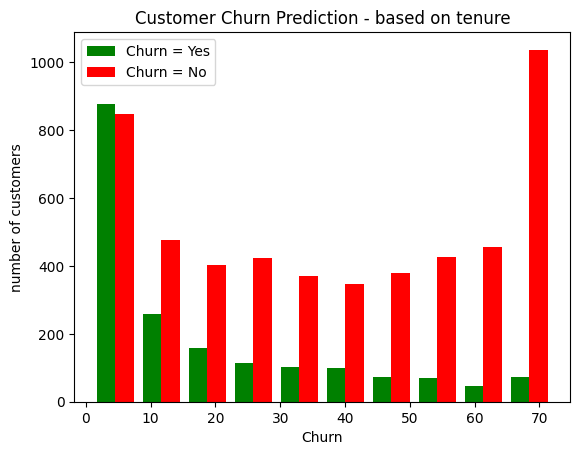

In [125]:
# how many custmers are leaving
# histogram will be a good visualization chart
# customers leaving and not leaving side by side with tenure as the x axis
# find customers with churn as no
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('Churn')
plt.ylabel('number of customers')
plt.title('Customer Churn Prediction - based on tenure')

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

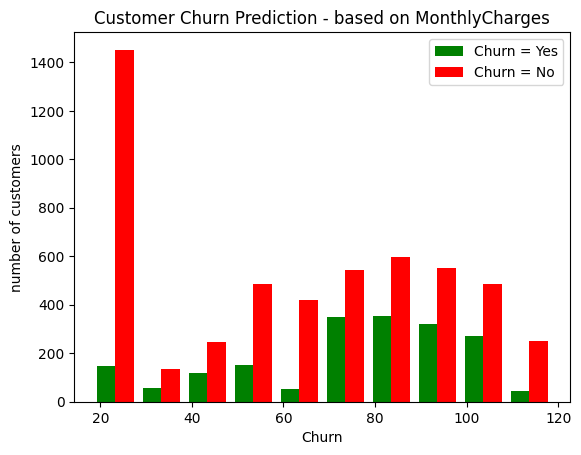

In [126]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Churn')
plt.ylabel('number of customers')
plt.title('Customer Churn Prediction - based on MonthlyCharges')

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

will do data preprocessing now - will do label encoding so that we will convert all the string values into 
numeric data so that it can be fed to ml algorithms

In [127]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [128]:
# the below function will return all columns with 'object' datatype
def unique_col_val(df):
    for column in df:
        if (df[column].dtype=='object'):
            print(f'{column} : {df[column].unique()}') # print all the unique elements in the df along with the column name

In [129]:
unique_col_val(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [257]:
# since 'No phone service' is same as 'no', replace 'No phone service' with 'no'
# since 'No internet service' is same as 'no', replace 'No internet service' with 'no'
df1.replace('No phone service', 'No', inplace=True)
df1.replace('No internet service', 'No', inplace=True)

/tmp/ipykernel_5935/4233346439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)
/tmp/ipykernel_5935/4233346439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)


In [131]:
unique_col_val(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [258]:
# lets prepare a array with columns having zero and one
# replace yes with 1 and no with 0
yes_no_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
               'StreamingMovies', 'PaperlessBilling', 'Churn', 'OnlineBackup']

for col in yes_no_cols:
    df1[col].replace({'Yes' : 1, 'No' : 0, 'Female' : 0, 'Male' : 1 }, inplace=True)

/tmp/ipykernel_5935/1768068762.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes' : 1, 'No' : 0, 'Female' : 0, 'Male' : 1 }, inplace=True)


In [259]:
unique_col_val(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [260]:
df1.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService   
0       0              0        1           0       1             0  \
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines InternetService  OnlineSecurity  OnlineBackup   
0              0             DSL               0             1  \
1              0             DSL               1             0   
2              0             DSL               1             1   
3              0             DSL               1             0   
4              0     Fiber optic               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies   
0                 0            0            0                0  \
1                 1            0            0                0   
2                 0            0            0                0   
3                 1            1            0                0   
4                 0            0            0                0   

         Contract  PaperlessBilling              PaymentMethod   
0  Month-to-month                 1           Electronic check  \
1        One year                 0               Mailed check   
2  Month-to-month                 1               Mailed check   
3        One year                 0  Bank transfer (automatic)   
4  Month-to-month                 1           Electronic check   

   MonthlyCharges  TotalCharges  Churn  
0           29.85         29.85      0  
1           56.95       1889.50      0  
2           53.85        108.15      1  
3           42.30       1840.75      0  
4           70.70        151.65      1

In [263]:
# do one hot encoding for the columns - 'InternetService', 'Contract', 'PaymentMethod', so that we get numeric value in those columns
# thi will add separate columns for unique values in these columns   - 'InternetService', 'Contract', 'PaymentMethod' 
df2 = pd.get_dummies(data=df1, columns = ['InternetService', 'Contract', 'PaymentMethod'], dtype=int)

df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [264]:
df2.sample(4)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService   
3746       0              0        1           0       1             1  \
6625       0              1        0           0      12             1   
3959       1              0        0           0      59             1   
444        0              0        1           0      36             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...   
3746              0               0             0                 0  ...  \
6625              1               0             1                 0  ...   
3959              0               0             0                 1  ...   
444               0               0             0                 0  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No   
3746                    0                            1                   0  \
6625                    0                            1                   0   
3959                    1                            0                   0   
444                     0                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year   
3746                        1                  0                  0  \
6625                        1                  0                  0   
3959                        0                  1                  0   
444                         1                  0                  0   

      PaymentMethod_Bank transfer (automatic)   
3746                                        0  \
6625                                        0   
3959                                        1   
444                                         0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check   
3746                                      0                               1  \
6625                                      0                               1   
3959                                      0                               0   
444                                       0                               1   

      PaymentMethod_Mailed check  
3746                           0  
6625                           0  
3959                           0  
444                            0  

[4 rows x 27 columns]

In [265]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [138]:
#scale the values in those columns which have values not between zero and one
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

<h3>Machine Learning Model</h3>

In [139]:
X = df2.drop('Churn', axis = 'columns')
y=df2['Churn']

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [141]:
X_train.shape

(5625, 26)

In [142]:
y_train.shape

(5625,)

In [143]:
X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

In [144]:
import tensorflow as tf
from tensorflow import keras

In [145]:
# in the below model, optimizer chosen is 'adam'
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,),activation = 'relu'), # there are 20 input neurons for 26 features
    #keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid') 
    # since the output is yes or no so there is only one feature, activation = 'sigmoid' works best
                          
])
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy', # since there are only binary output - yes or no
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 100)
model.evaluate(X_test, y_test)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4713 - accuracy: 0.7662
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.7966
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.7995
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8037
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8044
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8048
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8044
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8069
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8076
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4086 - accura

[0.45400184392929077, 0.7867803573608398]

In [146]:
# in the below model, optimizer chosen is 'SGD'
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,),activation = 'relu'), # there are 20 input neurons for 26 features
    #keras.layers.Dense(20, activation = 'relu'), # this is a hidden layer
    keras.layers.Dense(1, activation = 'sigmoid') 
    # since the output is yes or no so there is only one feature, activation = 'sigmoid' works best
                          
])
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=.001)

model.compile(
    optimizer = 'SGD',
    loss = 'binary_crossentropy', # since there are only binary output - yes or no
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 87)
model.evaluate(X_test, y_test)

Epoch 1/87
176/176 [==============================] - 1s 1ms/step - loss: 0.5732 - accuracy: 0.7141
Epoch 2/87
176/176 [==============================] - 0s 2ms/step - loss: 0.5056 - accuracy: 0.7424
Epoch 3/87
176/176 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7531
Epoch 4/87
176/176 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7703
Epoch 5/87
176/176 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7764
Epoch 6/87
176/176 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.7829
Epoch 7/87
176/176 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.7861
Epoch 8/87
176/176 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.7854
Epoch 9/87
176/176 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.7877
Epoch 10/87
176/176 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.7892

[0.43972885608673096, 0.7917554974555969]

In [147]:
yp = model.predict(X_test)
yp

44/44 [==============================] - 0s 1ms/step


array([[0.17181833],
       [0.33224374],
       [0.01180207],
       ...,
       [0.7268326 ],
       [0.66323626],
       [0.43068033]], dtype=float32)

In [148]:
y_pred = []
for element in yp:
    if element<.5:
        y_pred.append(0)
    if element>.5:
        y_pred.append(1)

In [149]:
y_pred

[0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,


In [150]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.54      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

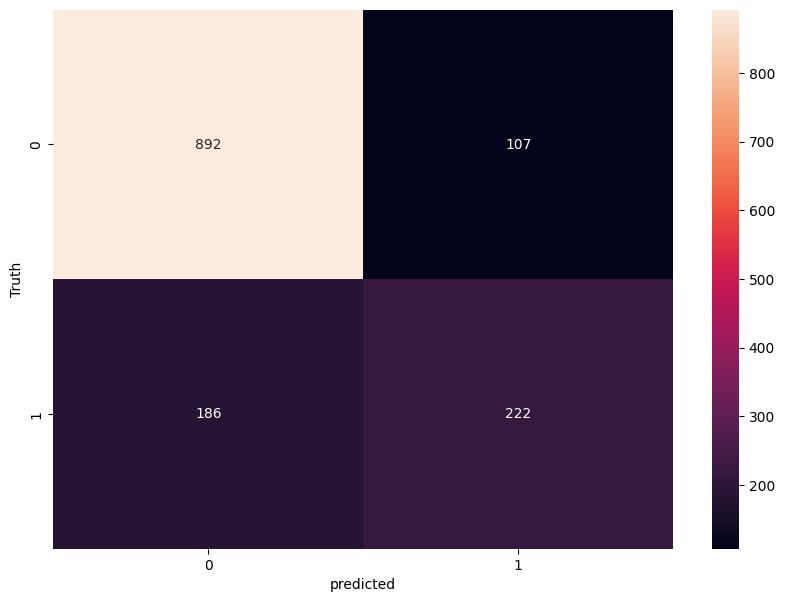

In [151]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels = y_test, predictions=y_pred)

plt.figure(figsize=(10,7))

sns.heatmap(cm, annot=True, fmt='d')

plt.xlabel('predicted')
plt.ylabel('Truth')




<h3>ml accounting for dataset imbalance</h3>

In [152]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [206]:
def ANN_sm(X_train_sm, y_train_sm, X_test_sm, y_test_sm, loss, weights):
    
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim = 26, activation = 'relu'),
        keras.layers.Dense(15, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(optimizer='adam', loss = loss, metrics = ['accuracy'])
    
    if weights == -1:
        model.fit(X_train_sm, y_train_sm, epochs = 100)
    else: 
        model.fit(X_train_sm, y_train_sm, loss = loss, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_pred_sm = model.predict(X_test_sm)
    y_pred_sm = np.round(y_preds_sm)
    
    print('Classification Report: \n', classification_report(y_test_sm, y_pred_sm))
    
    return y_pred_sm




In [267]:
# let us create a function that inturn will create our ML model

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim = 26, activation = 'relu'),
        keras.layers.Dense(15, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(optimizer='adam', loss = loss, metrics = ['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs = 100)
    else: 
        model.fit(X_train, y_train, loss = loss, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_pred = model.predict(X_test)
    y_pred = np.round(y_preds)
    
    print('Classification Report: \n', classification_report(y_test, y_pred))
    
    return y_pred




In [156]:
# call the ML model 
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)
y_preds

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5672 - accuracy: 0.6853
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.7861
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.7996
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8046
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8060
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8075
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8114
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8103
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8094
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4033 - accura

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [157]:
y_test.value_counts()

Churn
0    999
1    408
Name: count, dtype: int64

<h3>addressing imbalance data</h3>
- We have a very imbalnced data with '0' having 999 data points and '1' having just 408 data points.
- mentioned are some methods by which these can be addressed
1. Undersampling
2. Oversampling
3. SMOTE
4. use of Ensemble with undersampling


<h3>under sampling</h3>

In this method, we will have the same sample size for the two data points 0 and 1.

We will reduce the sample to the one which has the low count - in our case it is 1
We will create a new df with the same data as '1' above.
we will use sample method to get the same data 
concatenate the two df - one with 408 rows of data with '1' and the other with 408 rows of data with '0'
once concatenate is done, we will run the machine learning model and get the results

In [158]:
# counting the number of data with value '0' and '1'
class_0, class_1 = df.Churn.value_counts()
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [159]:
class_0, class_1

(5174, 1869)

In [160]:
df_class_0.shape, df_class_1.shape

((5163, 27), (1869, 27))

In [161]:
df_class_0_us = df_class_0.sample(class_1)

In [162]:
df_class_0_us.shape

(1869, 27)

In [163]:
df_test_us = pd.concat([df_class_0_us, df_class_1], axis = 0)
df_test_us.shape

(3738, 27)

In [164]:
print('Random under_sampling' )
print(df_test_us['Churn'].value_counts())


Random under_sampling
Churn
0    1869
1    1869
Name: count, dtype: int64


In [165]:
X_us = df_test_us.drop('Churn', axis = 'columns')
y_us = df_test_us.Churn

In [166]:
print(X_us.shape)  # Check the shape of X (number of rows should match the length of y)
print(y_us.shape)   # Check the length of y


(3738, 26)
(3738,)


In [167]:
from sklearn.model_selection import train_test_split
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, test_size = .2, random_state = 15, stratify = y_us)

In [169]:
y_train_us.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [168]:
X_train_us.shape,  X_test_us.shape, y_train_us.shape, y_test_us.shape

((2990, 26), (748, 26), (2990,), (748,))

In [273]:
def ANN_us(X_train_us, y_train_us, X_test_us, y_test_us, loss, weights):
    
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim = 26, activation = 'relu'),
        keras.layers.Dense(15, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(optimizer='adam', loss = loss, metrics = ['accuracy'])
    
    if weights == -1:
        model.fit(X_train_us, y_train_us, epochs = 100)
    else: 
        model.fit(X_train_us, y_train_us, loss = loss, class_weight = weights)
    
    print(model.evaluate(X_test_us, y_test_us))
    
    y_preds_us = model.predict(X_test_us)
    y_preds_us = np.round(y_preds_us)
    
    print('Classification Report: \n', classification_report(y_test_us, y_preds_us))
    
    return y_preds_us




In [170]:
y_preds_us = ANN_us(X_train_us, y_train_us, X_test_us, y_test_us, 'binary_crossentropy', -1)


Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6264 - accuracy: 0.6562
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.7485
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.7645
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7656
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7659
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7642
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.7682
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.7672
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7719
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.7702
Epoch 11/

<h3>oversampling</h3>

In this method, we will have the increase sample size for the data point with 1 as the data so that it is same as data rows containing 0.


We will create a new df with the same data as '0' above.
we will use sample method to increase the rows with the data 1
concatenate the two df - one with 408 rows of data with '1' and the other with 408 rows of data with '0'
once concatenate is done, we will run the machine learning model and get the results

In [268]:
# length of the two dfs df and df2 are different
# mostly some rows were removed earlier - rows with empty data
len(df2)

7032

In [172]:
len(df.Churn)

7043

In [173]:
# count the 'Churn' values in the df
# they are not same - 5163, 1869
count_class_0, count_class_1 = df2.Churn.value_counts()

In [174]:
count_class_0, count_class_1

(5163, 1869)

In [175]:
# df_class_0 = df2[df2['Churn'] == 0]
df_class_0 = df2[df2['Churn'] == 0]
len(df_class_0)

5163

In [270]:
# we will put the same number of rows in the df 'df_class_1' so that it is same as what is df 'df_class_0'
# using sample method
df_class_1 = df_class_1.sample(count_class_0, replace = True)

In [177]:
df_class_0.shape,df_class_1.shape

((5163, 27), (5163, 27))

In [271]:
# merge these two df - df_class_1 and df_class_0, to get 10326 rows
df_os = pd.concat([df_class_0, df_class_1], axis = 0)

In [179]:
df_os['Churn'].shape

(10326,)

In [180]:
# get X by dropping the target column
X_os = df_os.drop(['Churn'], axis = 1)
# get y which has values as in the target column
y_os = df_os['Churn']


In [188]:
X.shape, y.shape

((10326, 26), (10326,))

In [181]:
# generate X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size=.2, stratify = y_os)


In [182]:
# just to check whether the data is sampled correctly
y_train_os.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [272]:
def ANN_os(X_train_os, y_train_os, X_test_os, y_test_os, loss, weights):
    
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim = 26, activation = 'relu'),
        keras.layers.Dense(15, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(optimizer='adam', loss = loss, metrics = ['accuracy'])
    
    if weights == -1:
        model.fit(X_train_os, y_train_os, epochs = 100)
    else: 
        model.fit(X_train_os, y_train_os, loss = loss, class_weight = weights)
    
    print(model.evaluate(X_test_os, y_test_os))
    
    y_preds_os = model.predict(X_test_os)
    y_preds_os = np.round(y_preds_os)
    
    print('Classification Report: \n', classification_report(y_test_os, y_preds_os))
    
    return y_preds_os


In [190]:
# predict using the function
y_preds_os = ANN_os(X_train_os, y_train_os, X_test_os, y_test_os, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5488 - accuracy: 0.7281
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.7600
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7640
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4806 - accuracy: 0.7701
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7712
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7742
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.7752
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.7777
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.7812
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4544 - accura

<h3> SMOTE </h3>
This method uses KNN and creates new samples

In [198]:
X = df2.drop('Churn', axis = 'columns')
y = df2.Churn

In [199]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [200]:
X.shape, y.shape

((7032, 26), (7032,))

In [204]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X,y)

In [205]:
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [208]:
from sklearn.model_selection import train_test_split
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=.2, stratify = y_sm)

In [210]:
y_test_sm.value_counts()

Churn
0    1033
1    1033
Name: count, dtype: int64

In [213]:
def ANN_sm(X_train_sm, y_train_sm, X_test_sm, y_test_sm, loss, weights):
    
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim = 26, activation = 'relu'),
        keras.layers.Dense(15, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(optimizer='adam', loss = loss, metrics = ['accuracy'])
    
    if weights == -1:
        model.fit(X_train_sm, y_train_sm, epochs = 100)
    else: 
        model.fit(X_train_sm, y_train_sm, loss = loss, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_pred_sm = model.predict(X_test_sm)
    y_pred_sm = np.round(y_pred_sm)
    
    print('Classification Report: \n', classification_report(y_test_sm, y_pred_sm))
    
    return y_pred_sm




In [214]:
y_preds_sm = ANN_sm(X_train_sm, y_train_sm, X_test_sm, y_test_sm, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5344 - accuracy: 0.7368
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7828
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.7850
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.7864
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.7891
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4459 - accuracy: 0.7885
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.7914
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.7953
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.7946
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4356 - accura

<h3>use of Ensemble with undersampling</h3>

In [215]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [217]:
X_eu = df2.drop('Churn', axis = 'columns')
y_eu = df2['Churn']

In [220]:
from sklearn.model_selection import train_test_split
X_train_eu, X_test_eu, y_train_eu, y_test_eu = train_test_split(X_eu, y_eu, test_size=.2, stratify = y_eu)

In [221]:
y_train_eu.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [229]:
df3 = X_train_eu.copy()
df3['Churn'] = y_train_eu

In [230]:
df3_class_0 = df3[df3['Churn'] ==0]
df3_class_1 = df3[df3['Churn'] ==1]

In [231]:
df3_class_0.shape, df3_class_1.shape

((4130, 27), (1495, 27))

In [233]:
df3_class_0[:1495].shape

(1495, 27)

In [239]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis = 'rows')
    X_train_eu = df_train.drop(['Churn'], axis='columns')
    y_train_eu = df_train['Churn']
    return X_train_eu, y_train_eu 


In [244]:
X_train_eu_1, y_train_eu_1 = get_train_batch(df3_class_0, df3_class_1, 0, 1495)
X_train_eu.shape

(2990, 26)

In [245]:
def ANN_eu(X_train, y_train, X_test, y_test, loss, weights):
    
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim = 26, activation = 'relu'),
        keras.layers.Dense(15, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(optimizer='adam', loss = loss, metrics = ['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs = 100)
    else: 
        model.fit(X_train, y_train, loss = loss, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_pred_eu = model.predict(X_test)
    y_pred_eu = np.round(y_pred)
    
    print('Classification Report: \n', classification_report(y_test, y_pred_eu))
    
    return y_pred_eu




In [247]:
# first predcition out of three
y_preds_eu_1 = ANN_eu(X_train_eu_1, y_train_eu_1, X_test_eu, y_test_eu, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6373 - accuracy: 0.6548
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7478
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.7542
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7582
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7585
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7582
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7669
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.7652
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7692
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4763 - accuracy: 0.7649
Epoch 11/

In [248]:
X_train_eu_2, y_train_eu_2 = get_train_batch(df3_class_0, df3_class_1, 1495, 2990)
# second predcition out of three
y_preds_eu_2 = ANN_eu(X_train_eu_2, y_train_eu_2, X_test_eu, y_test_eu, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6166 - accuracy: 0.6652
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.7311
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.7475
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7548
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7575
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7622
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.7622
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.7686
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.7662
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7672
Epoch 11/

In [249]:
X_train_eu_3, y_train_eu_3 = get_train_batch(df3_class_0, df3_class_1, 2990, 4130)
# third predcition out of three
y_preds_eu_3 = ANN_eu(X_train_eu_3, y_train_eu_3, X_test_eu, y_test_eu, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.5935 - accuracy: 0.7108
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.7727
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.7723
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7750
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7825
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4778 - accuracy: 0.7818
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7818
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7787
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7799
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7825
Epoch 11/

In [250]:
y_preds_eu_3

array([0, 0, 0, ..., 1, 1, 0])

In [253]:
y_pred_eu_final = y_preds_eu_1.copy()
for i in range (len(y_preds_eu_1)):
    n_ones = y_preds_eu_1[i]+y_preds_eu_2[i]+y_preds_eu_3[i]
    if n_ones<1:
        y_pred_eu_final[i] = 1
    else:
        y_pred_eu_final[i] = 0
        

In [255]:
print(classification_report(y_test_eu,y_pred_eu_final))

              precision    recall  f1-score   support

           0       0.74      0.24      0.36      1033
           1       0.27      0.77      0.40       374

    accuracy                           0.38      1407
   macro avg       0.50      0.50      0.38      1407
weighted avg       0.61      0.38      0.37      1407

